**Projet interpormo 2022**

**Groupe 5 : Génération de nouvelles observations**

**Travail préparatoire : Exploratory Data Analysis**

# Exploratory Data Analysis using Titanic dataset

**What is EDA?**
 
Exploratory Data Analysis (EDA) is a method used to analyze and summarize datasets. Majority of the EDA techniques involve the use of graphs.

**Titanic Dataset** 

It is one of the most popular datasets used for understanding machine learning basics. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. This dataset can be used to predict whether a given passenger survived or not.

<center>


| Variable| Desciption | Key |
| --- | --- | --- |
|PassengerID|Unique Id of a passenger|
|Survival|	Survival|	0 = No, 1 = Yes
|Pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd
|Name| Passenger's name|
|Sex	|Sex	
|Age	|Age in years	
|Sibsp	|Number of siblings / spouses aboard the Titanic	
|Parch	|Number of parents / children aboard the Titanic	
|Ticket	|Ticket number	
|Fare	|Passenger fare	
|Cabin	|Cabin number	
|Embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton


</center>

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

## Importing the dataset

In [2]:
df = pd.read_csv('titanic.csv')

## Basic analysis

In this part we will mainly use the [Pandas library](https://pandasguide.readthedocs.io/en/latest/#), I let you look at the documentation for more information 

In [3]:
#Find the dimensions of the dataset
df.shape

(891, 12)

After loading the dataset we’ll first look at the dimensions of the dataset. The data has 891 samples/records and 12 features/variables.

In [4]:
# Look at first few records of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at few records of the dataset gives some first impressions of the data like features, data types of the features, etc.

In [5]:
#Look at the feature names
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Next, we’ll look at what columns are present in our data set. In larger data sets (with 300s of features), getting an idea of features looking at the first few records might not be possible. Hence, looking at the features alone might help. In this step, it is advisable to refer to the metadata document shared by the client or any other stakeholders of the project. This will give you a good idea of the features in the dataset

In [6]:
# Look at the data types of the features
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Since, we have an understanding of the features in the data set. Look for the data types of the features and correct any anomalous data types.

In [7]:
#Look at statistical summary of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Statistical summary of the features can be useful in inspecting the feature distribution and anomalies, if any.

In [8]:
# Create table for missing data analysis
def missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() /
               df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent],
                             axis=1,
                             keys=['Total', 'Percent'])
    return missing_data

In [9]:
# Analyse missing data
missing_data_table(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


*Cabin* has too many missing values, this variable should be removed before training.

In [10]:
# Filtering under one condition
df[df.Age > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [11]:
df[df["Embarked"].isnull() == True]  # Finding the null values with .isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
df.nunique(
)  # by typing this, we can see the counts of unique numbers in each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
df["Sex"].value_counts(
)  # Using .value_counts() to count the occurences of each variable in a column

male      577
female    314
Name: Sex, dtype: int64

## Exploring Data through Visualizations

In this section we will mainly use the  [Seaborn library](https://seaborn.pydata.org) for data visualisation. 

I will give you some typical examples of visualizations made with this library for different types of analysis. 


The goal here is that you should be able to interpret these visualizations in order to better understand the data and to create other visualizations yourself using the library documentation.  

### Univariate Analysis 

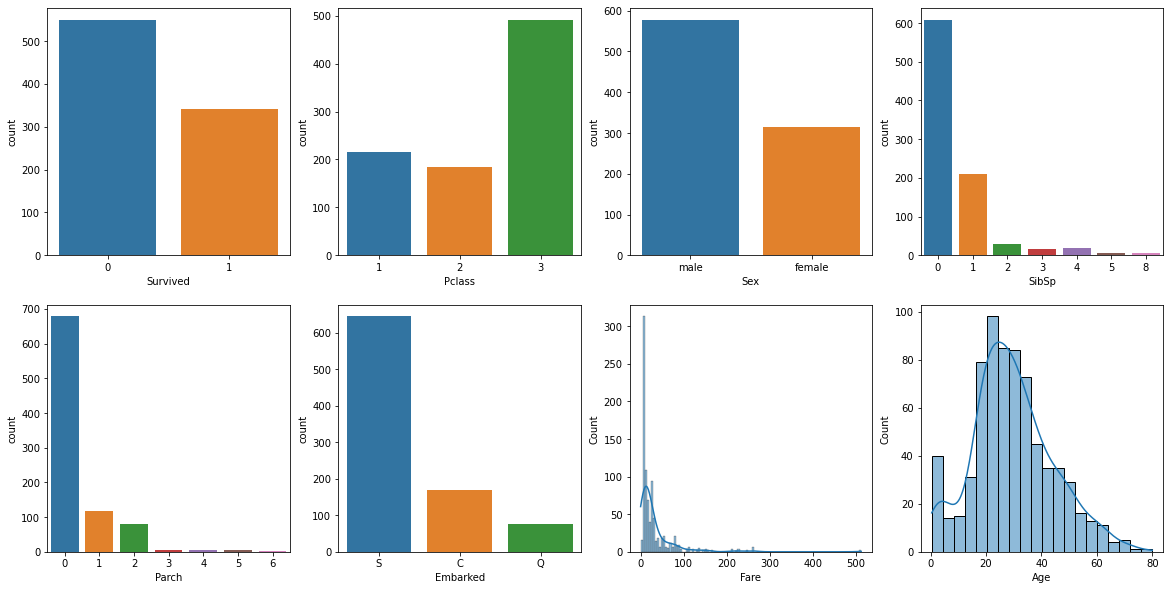

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
sb.countplot(x='Survived', data=df, ax=axes[0, 0])
sb.countplot(x='Pclass', data=df, ax=axes[0, 1])
sb.countplot(x='Sex', data=df, ax=axes[0, 2])
sb.countplot(x='SibSp', data=df, ax=axes[0, 3])
sb.countplot(x='Parch', data=df, ax=axes[1, 0])
sb.countplot(x='Embarked', data=df, ax=axes[1, 1])
sb.histplot(df['Fare'], kde=True, ax=axes[1, 2])
sb.histplot(df['Age'].dropna(), kde=True, ax=axes[1, 3])
plt.show()

**Your interpretations :**


In [15]:
# Try to produce new visuals

### Bivariate Analysis 

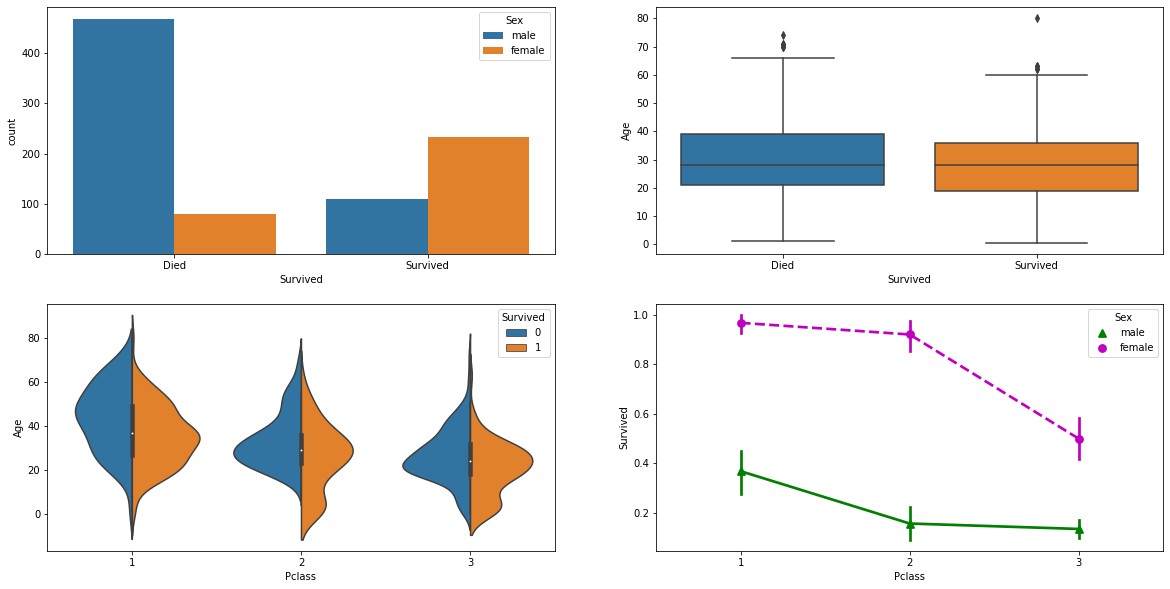

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sb.countplot(x="Survived", hue="Sex", data=df,
             ax=axes[0, 0]).set(xticklabels=["Died", "Survived"])
sb.boxplot(x="Survived", y="Age", data=df,
           ax=axes[0, 1]).set(xticklabels=["Died", "Survived"])
sb.violinplot(data=df,
              x='Pclass',
              y='Age',
              hue='Survived',
              split=True,
              ax=axes[1, 0])
sb.pointplot(x="Pclass",
             y="Survived",
             hue="Sex",
             palette={
                 "male": "g",
                 "female": "m"
             },
             markers=["^", "o"],
             linestyles=["-", "--"],
             data=df,
             ax=axes[1, 1])
plt.show()

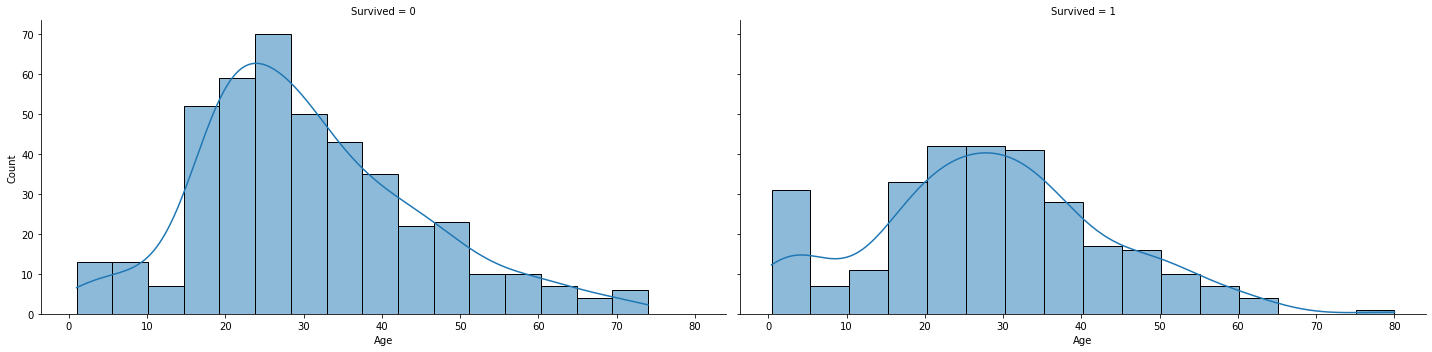

In [17]:
ax = sb.FacetGrid(df, col="Survived", height=5, aspect=2)
ax = ax.map(sb.histplot, "Age", kde=True)

In [18]:
# Between categorical variables
table = pd.crosstab([df['Survived']], df['Sex'])
chi2, p, dof, ex = stats.chi2_contingency(table.values)
print(chi2, p)

260.71702016732104 1.1973570627755645e-58


**Your interpretations :**


In [19]:
# Try to produce new visuals

### Multivariate Analysis 

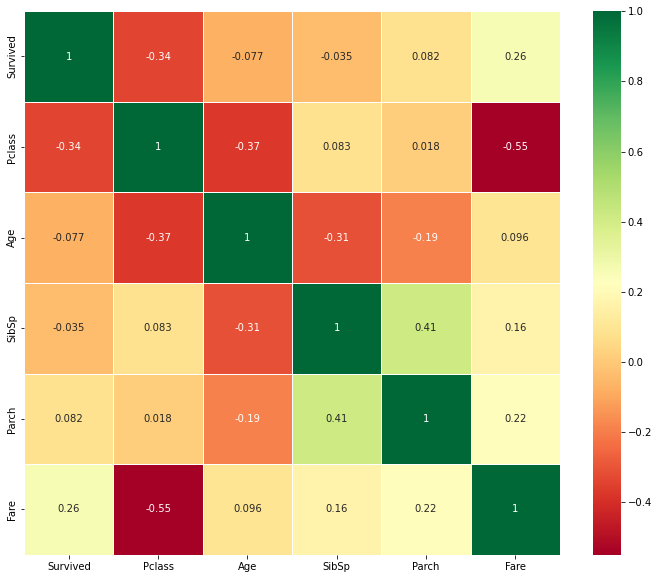

In [20]:
# Construct a Coorelation matrix of numerical features
corr = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr()
plt.figure(figsize=(12, 10))
ax = sb.heatmap(corr, cmap='RdYlGn', linewidths=1, annot=True)

**Your interpretations :**


In [21]:
# Try to produce new visuals